# Iris Demo
+ Check any null and invalid values
+ Ensure the properties of features and labels
+ Convert the string value into computational forms
+ PCA -> Cluster Verification (optional)
+ Logistic Regreesion/SVM (optional)

### Import Iris DataSet from sklearn

In [8]:
from sklearn.datasets import load_iris
irisdata = load_iris()

### Convert data form into Pandas format

In [54]:
import pandas as pd
features = pd.DataFrame(irisdata['data'])
features.columns = irisdata['feature_names']
targets = pd.DataFrame(irisdata['target'])
targets = targets.replace([0,1,2],irisdata['target_names'])

### Check if there is any null values

In [55]:
features.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [56]:
targets.isnull().sum()

0    0
dtype: int64

#### 3 group to classify

In [57]:
targets[0].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### 150 instances and 4 features

In [58]:
features.shape

(150, 4)

#### Convet all the unique string values into integers. Perform label encoding on the data

In [66]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in targets.columns:
    targets[col] = labelencoder.fit_transform(targets[col])

#### Check the encoded values

In [64]:
targets[0].unique()

array([0, 1, 2], dtype=int64)

In [65]:
print(targets.groupby(0).size())

0
0    50
1    50
2    50
dtype: int64


### Plot boxplot to visualize the distribution of the data

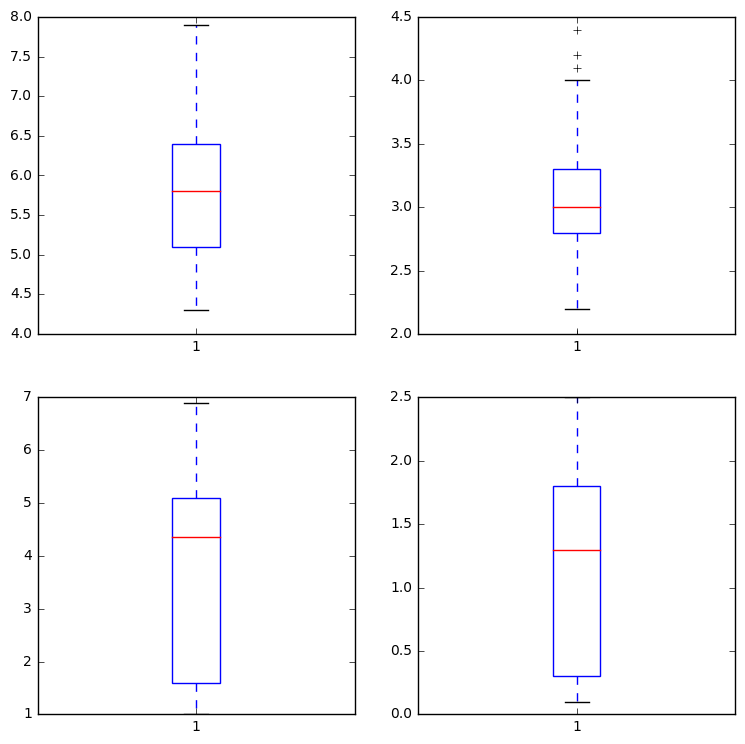

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(9,9))

fig1 = axes[0,0].boxplot(features['sepal length (cm)'],patch_artist=True)
fig2 = axes[0,1].boxplot(features['sepal width (cm)'],patch_artist=True)
fig3 = axes[1,0].boxplot(features['petal length (cm)'],patch_artist=True)
fig4 = axes[1,1].boxplot(features['petal width (cm)'],patch_artist=True)

### Info of features

In [69]:
features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
features.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


### Standardising the features

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)
X

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

### PCA(optional)

In [74]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ -2.26454173e+00,   5.05703903e-01,  -1.21943348e-01,
         -2.30733235e-02],
       [ -2.08642550e+00,  -6.55404729e-01,  -2.27250832e-01,
         -1.03208244e-01],
       [ -2.36795045e+00,  -3.18477311e-01,   5.14796236e-02,
         -2.78252250e-02],
       [ -2.30419716e+00,  -5.75367713e-01,   9.88604444e-02,
          6.63114622e-02],
       [ -2.38877749e+00,   6.74767397e-01,   2.14278490e-02,
          3.73972870e-02],
       [ -2.07053681e+00,   1.51854856e+00,   3.06842583e-02,
         -4.39877494e-03],
       [ -2.44571134e+00,   7.45626750e-02,   3.42197636e-01,
          3.80965668e-02],
       [ -2.23384186e+00,   2.47613932e-01,  -8.25744645e-02,
          2.55051623e-02],
       [ -2.34195768e+00,  -1.09514636e+00,   1.53562399e-01,
          2.67938291e-02],
       [ -2.18867576e+00,  -4.48629048e-01,  -2.46559522e-01,
          3.99073035e-02],
       [ -2.16348656e+00,   1.07059558e+00,  -2.64009373e-01,
         -1.53011377e-02],
       [ -2.32737775e

In [76]:
covariance = pca.get_covariance()
explained_variance = pca.explained_variance_
explained_variance

array([ 2.91081808,  0.92122093,  0.14735328,  0.02060771])

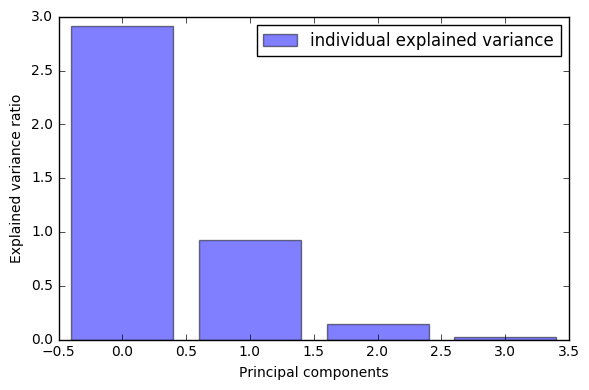

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6, 4))
    
plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

The last 1 componen has less amount of variance of the data. The first 3 components retains more than 90% of the data.(Here, compared with only 4 features, there're enough instances to support the final results. We shall take all features into consideration)

### Consider first 3 components and visualise it using K-means clustering

In [116]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=5)
x_clustered = kmeans.fit_predict(x_pca)

y = targets.values
y = y.reshape(y.size)

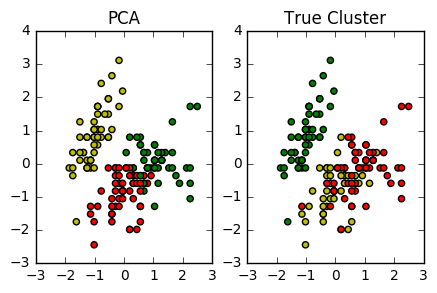

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r'
                  }

label_color = [LABEL_COLOR_MAP[i] for i in x_clustered]
y_color = [LABEL_COLOR_MAP[i] for i in y]

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(5,3))

axes[0].scatter(X[:,0],X[:,1], c= label_color)
axes[0].set_title('PCA')
axes[1].scatter(X[:,0],X[:,1], c= y_color)
axes[1].set_title('True Cluster');

Using K-means, we are able to segregate 3 classes well using the first 3 components with maximum variance. (Don't mind the color type, which is meaningless in clustering).

You can apply PCA firstly before using machine learning in the next steps

### Splitting the data into training and testing dataset

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

### Default Logistic Regression(optional)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

modelLR = LogisticRegression(n_jobs=-1)

modelLR.fit(X_train,y_train);

In [130]:
y_pred = modelLR.predict(X_test)
modelLR.score(X_test,y_pred)

1.0

In [131]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[15,  1,  0],
       [ 0,  5,  0],
       [ 0,  1,  8]])

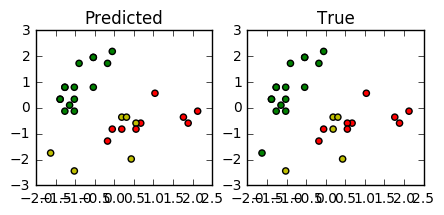

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r'
                  }

pred_color = [LABEL_COLOR_MAP[i] for i in y_pred]
test_color = [LABEL_COLOR_MAP[i] for i in y_test]

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(5,2))

axes[0].scatter(X_test[:,0],X_test[:,1], c= pred_color)
axes[0].set_title('Predicted')
axes[1].scatter(X_test[:,0],X_test[:,1], c= test_color)
axes[1].set_title('True');

### Tuned Logistic Regression(optional)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

LRs= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

modelLR=GridSearchCV(LRs, tuned_parameters,cv=10)

Search best combinations of parameter values based on the dataset. 
+ "C": Inverse of regularization strength
+ "Penalty": The norm used in the penalization

In [140]:
modelLR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [141]:
print(modelLR.best_params_)

{'penalty': 'l1', 'C': 1000}


In [142]:
y_pred = modelLR.predict(X_test)
modelLR.score(X_test,y_pred)

1.0

In [143]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[15,  1,  0],
       [ 0,  4,  1],
       [ 0,  1,  8]])

In [144]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      0.94      0.97        16\n          1       0.67      0.80      0.73         5\n          2       0.89      0.89      0.89         9\n\navg / total       0.91      0.90      0.90        30\n'

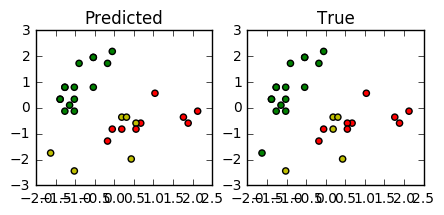

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r'
                  }

pred_color = [LABEL_COLOR_MAP[i] for i in y_pred]
test_color = [LABEL_COLOR_MAP[i] for i in y_test]

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(5,2))

axes[0].scatter(X_test[:,0],X_test[:,1], c= pred_color)
axes[0].set_title('Predicted')
axes[1].scatter(X_test[:,0],X_test[:,1], c= test_color)
axes[1].set_title('True');

### SVM(optional)

In [149]:
from sklearn.svm import SVC

svm= SVC()
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [165]:
from sklearn.model_selection import RandomizedSearchCV
modelsvm = RandomizedSearchCV(svm, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [166]:
modelsvm.fit(X_train, y_train)
print(modelsvm.best_score_)

0.975


In [170]:
modelsvm.cv_results_

{'mean_fit_time': array([ 0.0003    ,  0.0006    ,  0.0006    ,  0.0006    ,  0.00039999,
         0.00050001,  0.00019999,  0.00070002,  0.00080004,  0.00059998,
         0.00030003,  0.0003    ,  0.00039999,  0.00050001,  0.00050001,
         0.00049999,  0.00080006,  0.0003    ,  0.00039997,  0.00029998]),
 'mean_score_time': array([  3.99994850e-04,   1.99985504e-04,   0.00000000e+00,
          1.99985504e-04,   0.00000000e+00,   2.00033188e-04,
          1.00016594e-04,   0.00000000e+00,   1.99985504e-04,
          1.00016594e-04,   9.99927521e-05,   9.99927521e-05,
          0.00000000e+00,   1.99985504e-04,   2.00009346e-04,
          9.99927521e-05,   9.99927521e-05,   3.99994850e-04,
          0.00000000e+00,   9.99927521e-05]),
 'mean_test_score': array([ 0.95833333,  0.975     ,  0.9       ,  0.375     ,  0.975     ,
         0.95833333,  0.975     ,  0.96666667,  0.9       ,  0.375     ,
         0.96666667,  0.95833333,  0.95833333,  0.96666667,  0.9       ,
         0.958

In [155]:
print(modelsvm.best_params_)

{'kernel': 'rbf', 'C': 1, 'gamma': 0.1}


In [157]:
y_pred= modelsvm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.933333333333


In [158]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  1,  8]])

In [159]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        16\n          1       0.80      0.80      0.80         5\n          2       0.89      0.89      0.89         9\n\navg / total       0.93      0.93      0.93        30\n'

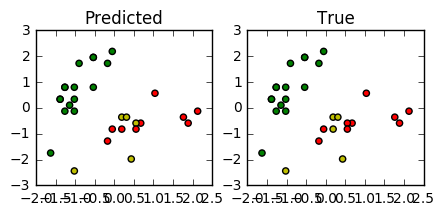

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r'
                  }

pred_color = [LABEL_COLOR_MAP[i] for i in y_pred]
test_color = [LABEL_COLOR_MAP[i] for i in y_test]

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(5,2))

axes[0].scatter(X_test[:,0],X_test[:,1], c= pred_color)
axes[0].set_title('Predicted')
axes[1].scatter(X_test[:,0],X_test[:,1], c= test_color)
axes[1].set_title('True');